In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

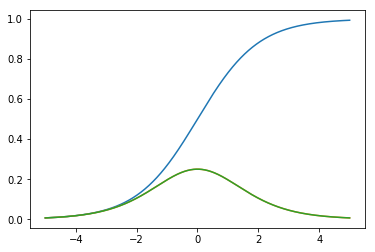

In [2]:
#sigmoid and its gradient 
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))
def grad_sigmoid(x):
    return exp(-x)/(1+exp(-x))**2
def ds(x):
    return (1 - sigmoid(x))*sigmoid(x)
plot_function(sigmoid,-5,5)
plot_function(grad_sigmoid,-5,5)
plot_function(ds,-5,5)

In [3]:
#NN
import copy
class NeuralNetwork():
    def __init__(self,layer_sizes):
        mult=1
        self.layer_sizes = layer_sizes
        self.layer_count = len(layer_sizes)
        self.weights = [
            2*(np.random.randn(n,m) -0.5)*mult 
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:])
        ]
        
    def feedforward(self,v):
        activationsOut = [v]
        activationsIn = [v]
        a = v #zeroth layer
        for layer,w in enumerate(self.weights):
            z = w @ a 
            if layer < self.layer_count-2:
                a = [sigmoid(x) for x in z]
            else:  # No activation for last layer
                a = z
            activationsOut.append(a)
            activationsIn.append(z)
        return activationsIn,activationsOut
    
    def backpropagate(self,a,u,y):
        d = np.array(copy.copy(a))*0
        epsilon=np.array([-oi+yi for yi,oi in zip(y,a[-1])])
        d[-1] = epsilon #no activation
        for layer in reversed(range(1,len(self.weights))):
            z = d[layer+1] @ self.weights[layer] 
            auz=[grad_sigmoid(node) for node in u[layer]]
            d[layer]= np.array(z)*np.array(auz)
        return d

    
    def dw(self,x,y,learning_rate=0.01):
        # only uses one training example!
        # dw is the correction needed to be applied on weights 
        u,a = self.feedforward(x)
        d = self.backpropagate(a,u,y)
        dw=copy.copy(self.weights)
        for layer,w in enumerate(self.weights):
            dw[layer] = learning_rate * np.outer(d[layer+1], a[layer])
        return dw
    
    
    def evaluate(self,v):
        _,a=self.feedforward(v)
        return np.array(a[-1])
    
    def cost(self,x,y):
        return np.linalg.norm(np.array(self.evaluate(x))-y)

    def train_simple(self,x,y,learning_rate=0.01,epochs=100):
        for epoch in range(epochs):
            err=[]
            for xi,yi in zip(x, y):
                dw = self.dw(xi,yi,learning_rate=learning_rate)
                for layer,_ in enumerate(self.weights):
                    self.weights[layer] += dw[layer] #by convention adding it dw to weights (it all depends on the definisiton of epsilons see haykin) 
                err.append(self.cost(xi,yi))
            print (epoch, np.mean(err),np.max(err))    
    

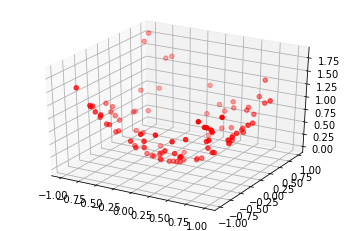

In [4]:
# 2D simple 2d input -> 1d output training set (easy visualization)
x=2*(np.random.rand(100,2)-0.5)
y=[(i[0])**2+(i[1])**2 for i in x]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, c='r', marker='o')

In [5]:
#train
nn = NeuralNetwork([2,10,10,10,1])
nn.train_simple(x,[[yi] for yi in y],epochs=1000,learning_rate=0.1)

0 0.8430392787628914 2.4931564526227206
1 0.47008316646738 1.5256996583889182
2 0.3962792129335843 1.297734438388735
3 0.35792151255565363 1.1235939137599307
4 0.33389289946707346 1.0228266493213491
5 0.32160274094712354 0.9753205939449124
6 0.3152726349810019 0.9516334295771939
7 0.3108554885127161 0.938978045768188
8 0.3077180721299404 0.9318241087190731
9 0.3050729983906136 0.9275499322262966
10 0.3029855035693332 0.9248424178333696
11 0.30140725183520173 0.9230264092123639
12 0.29996534302710937 0.9217483747776856
13 0.2984960933614149 0.9208174568504578
14 0.2969898220572653 0.9201244406594228
15 0.29543770114427415 0.9196010437440966
16 0.2938307697500307 0.9191999866862981
17 0.2922000496294916 0.9188854865080035
18 0.2905122074696092 0.9186288100092139
19 0.2887358312656596 0.9184062226376367
20 0.28686226450419106 0.9181980615672849
21 0.28489629532758715 0.917988333225391
22 0.2828319141829861 0.9177645248254271
23 0.2806508230861377 0.9175174151816946
24 0.2783791694921308 0

202 0.027827776921487694 0.12165575767045489
203 0.02771428495356348 0.12147983119572903
204 0.027601796748595687 0.12130422580879907
205 0.02749029050548889 0.12112887748266132
206 0.02737974492114802 0.12095372408057181
207 0.027270426496957177 0.12077870535435942
208 0.027162154958987925 0.12060376293882169
209 0.027054793684134257 0.12042884034258639
210 0.02694832263074612 0.12025388293567962
211 0.026842722256924696 0.12007883793413798
212 0.026737973512003518 0.11990365438193162
213 0.026634057827943897 0.11972828313044137
214 0.02653118912368548 0.11955267681575865
215 0.026430962772217913 0.11937678983404099
216 0.026331472328578954 0.11920057831513531
217 0.02623270217789848 0.11902400009466918
218 0.026137217625336343 0.1188470146848386
219 0.026042652960669807 0.11866958324402765
220 0.025948754832344864 0.11849166854547444
221 0.02585688300942504 0.11831323494510415
222 0.025765728293759074 0.11813424834871822
223 0.025675183517304485 0.11795467617862454
224 0.025585236269

394 0.015980664416757526 0.07678880978132652
395 0.01594340025736293 0.07653051616213435
396 0.01590624669740703 0.07627260818604742
397 0.015869203741220157 0.07601509320501665
398 0.01583227138851881 0.07575797847169907
399 0.015795449634421855 0.07550127113964933
400 0.015758738469463757 0.07524497826351118
401 0.015722137879613275 0.07498910679926007
402 0.015685647846289803 0.07473366360443456
403 0.015649268346380016 0.07447865543841836
404 0.015612999352258416 0.07422408896272581
405 0.015576840831805772 0.07396997074128753
406 0.015540792748429929 0.07371630724080402
407 0.015504855061086542 0.07346310483105878
408 0.01546902772430076 0.07321036978528994
409 0.015433310688190005 0.07295810828056526
410 0.015397703898487118 0.07270632639816377
411 0.015362246741683573 0.07245503012398158
412 0.015327016937193773 0.07220422534896043
413 0.015291896122995698 0.07195391786951455
414 0.015256884224170127 0.07170411338797855
415 0.015221981161536391 0.07145481751307203
416 0.01518718

578 0.010994499195790536 0.053130007396218315
579 0.010976239029448212 0.053076875248156075
580 0.010958035780941934 0.05302368544803643
581 0.010939889215257572 0.05297043884626651
582 0.010921799097856049 0.05291713628452377
583 0.010904044931788218 0.052863778595920674
584 0.010886476439696915 0.05281036660517219
585 0.010868961770649435 0.052756901128764855
586 0.010851500696333732 0.05270338297511079
587 0.010834092989043382 0.052649812944711716
588 0.010816738421687556 0.05259619183031333
589 0.010799436767801228 0.05254252041705226
590 0.010782187801551692 0.05248879948261026
591 0.010765656905841947 0.05243502979735171
592 0.010749515668122385 0.05238121212447394
593 0.01073341899531175 0.05232734722014537
594 0.010717366708481642 0.052273435833635695
595 0.010701358629254653 0.05221947870745364
596 0.010685394579811124 0.05216547657747539
597 0.010669474382892945 0.05211143017308234
598 0.010653597861810733 0.05205734021726932
599 0.010637764840446288 0.052003207426776055
600 

773 0.00848310950285113 0.04241945490142168
774 0.008473240660725308 0.04236562417430961
775 0.00846342658732368 0.04231182723259225
776 0.008453633710232455 0.042258064324515676
777 0.0084438619522399 0.042204335696554685
778 0.008434111236522514 0.04215064159344789
779 0.008424381486645116 0.04209698225816533
780 0.008414672626555547 0.04204335793195135
781 0.008404984580586432 0.04198976885430511
782 0.008395317273448874 0.041936215262992016
783 0.008385670630232038 0.04188269739404826
784 0.008376044576402243 0.04182921548179119
785 0.008366439037797806 0.041775769758823245
786 0.008356853940629884 0.04172236045602451
787 0.008347289211477931 0.04166898780257733
788 0.008337744777288974 0.04161565202596079
789 0.008328220565374718 0.04156235335195513
790 0.00831871650340942 0.04150909200465469
791 0.008309232519428762 0.041455868206465685
792 0.00829976854182531 0.04140268217811649
793 0.00829032449935017 0.041349534138663324
794 0.00828090032110675 0.04129642430549563
795 0.008271

959 0.006996618012113562 0.03317589736401849
960 0.006990280561162962 0.03313106318181863
961 0.0069839528510990375 0.03308628531139873
962 0.006977634854964645 0.033041563782693684
963 0.006971326545930311 0.03299689862501498
964 0.0069650362952317834 0.032952289867063056
965 0.006958863369282734 0.03290773753692372
966 0.006952699924826497 0.03286324166208243
967 0.006946545935159075 0.03281880226942274
968 0.006940401373706514 0.03277441938523068
969 0.006934286313303428 0.032730093035201524
970 0.006928182866565077 0.03268582324443997
971 0.006922088540735862 0.03264161003746757
972 0.006916003311446084 0.03259745343823067
973 0.006909927154440349 0.03255335347009053
974 0.006903860045580689 0.03250931015584446
975 0.006898037491842353 0.03246532351771897
976 0.0068922301279394135 0.03242139357738161
977 0.006886431332638725 0.03237752035593183
978 0.006880641082945274 0.03233370387392204
979 0.006874859355971974 0.03228994415134556
980 0.006869086128941488 0.032246241207656234
981

<Figure size 1440x720 with 0 Axes>

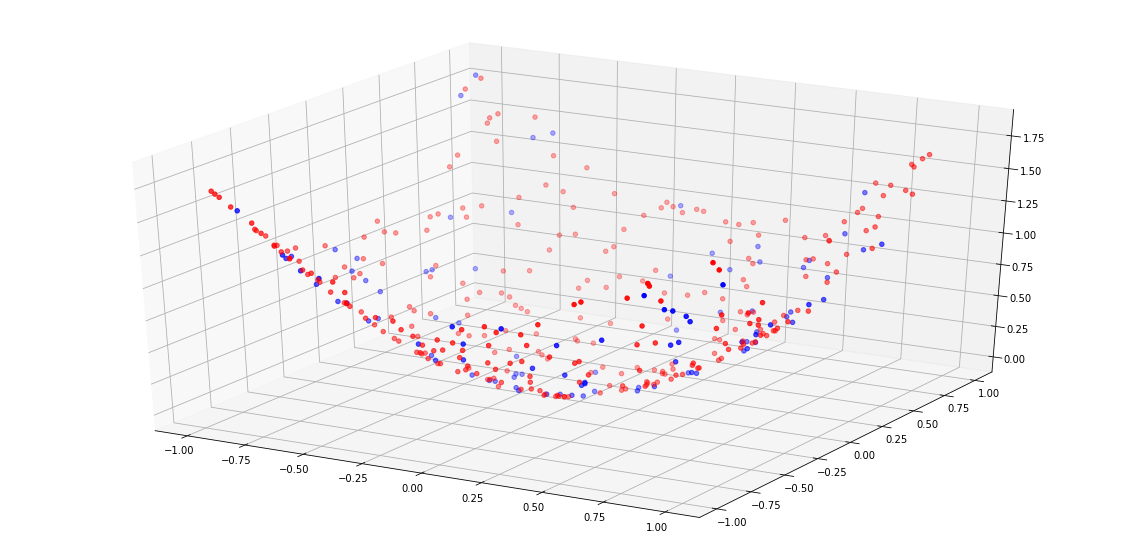

<Figure size 1440x720 with 0 Axes>

In [6]:
xx=2*(np.random.rand(300,2)-0.5)
plt.rcParams['figure.figsize'] = [20, 10]
yy=[nn.evaluate(i)[0] for i in xx]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx[:,0], xx[:,1], yy, c='r', marker='o')
ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')
plt.figure()

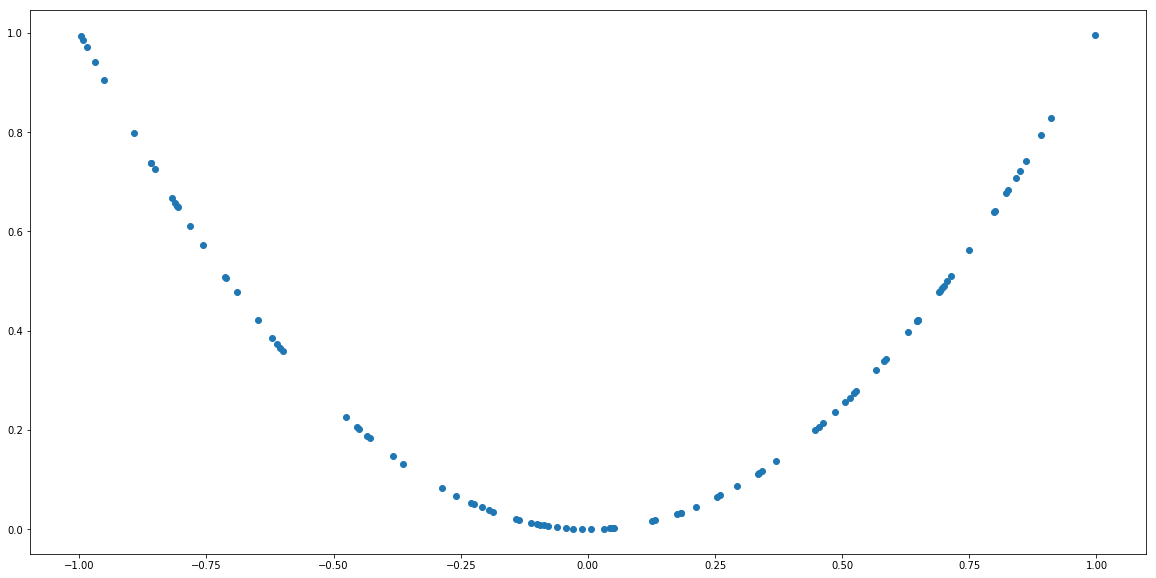

In [7]:
#1D
#simple 1d input -> 1d output training set (easy visualization)
x=2*(np.random.rand(100,1)-0.5)
y=(x)**2
plt.plot(x,y,'o')

In [8]:
#train
nn = NeuralNetwork([1,10,10,10,1])
nn.train_simple(x,y,epochs=1000,learning_rate=0.01)


0 0.20563362812797503 0.5468149410179186
1 0.17677018313198528 0.4707741923260098
2 0.16739983525564078 0.4317445664081183
3 0.1610116962688466 0.40793505820197384
4 0.15581289057976636 0.3977245788699878
5 0.1511039326488881 0.3928575092889548
6 0.14664886215855233 0.38697181711659967
7 0.14234687449743708 0.3807160204382284
8 0.13815470734186966 0.37435805049924786
9 0.13410811631087868 0.36800787077847885
10 0.1301645250907689 0.3617103130194331
11 0.12630167736127307 0.3554836723478445
12 0.122547210913729 0.34933568761115363
13 0.11892259981811726 0.3432701088008986
14 0.1153769569531678 0.33728935305427454
15 0.11191093768568987 0.33139553905016017
16 0.10864161419709234 0.3255908519804448
17 0.10550684435729032 0.3198776348346444
18 0.10245093256816702 0.3142583705197207
19 0.09947441114642935 0.3087356233502737
20 0.09664716231811195 0.30331196860723797
21 0.09392476609410401 0.29798992230187504
22 0.09138307867484015 0.2927718763491004
23 0.0889550513155999 0.28766004139621415

189 0.024438528576674456 0.11262982407985911
190 0.024328049174918934 0.11273009606324458
191 0.024218459495213732 0.11282762763207821
192 0.024109751615887513 0.11292245389637978
193 0.02400191768104192 0.11301460961419929
194 0.023894949900324855 0.11310412919177193
195 0.023788840548688815 0.11319104668388225
196 0.02368358196613747 0.11327539579445978
197 0.02357916655745702 0.11335720987734543
198 0.02347558679193557 0.1134365219372504
199 0.02337283520307281 0.11351336463086625
200 0.02327090438827479 0.11358777026815514
201 0.02316978700854469 0.11365977081374357
202 0.02306947578815818 0.11372939788848435
203 0.02296996351433473 0.11379668277111088
204 0.02287124303689784 0.11386165640001245
205 0.022773307267929418 0.11392434937512186
206 0.022676149181416375 0.11398479195987776
207 0.022579761812889773 0.11404301408328976
208 0.02248413825906056 0.11409904534206838
209 0.022389586441148347 0.11415291500284652
210 0.022298044405188823 0.11420465200444596
211 0.0222076690748292

378 0.015421264647906007 0.10755254584058727
379 0.015406987093110393 0.10747565629748979
380 0.01539278211342069 0.10739868829955956
381 0.015378649171951399 0.10732164511215425
382 0.015364587736411542 0.10724452995566869
383 0.015350597279064295 0.1071673460060858
384 0.01533667727668546 0.1070900963955349
385 0.015322827210523114 0.107012784212827
386 0.015309046566255275 0.10693541250398897
387 0.015295334833951069 0.10685798427280535
388 0.015282215345083679 0.10678050248132531
389 0.015269614826989375 0.10670297005039175
390 0.015257755383624933 0.10662538986014314
391 0.015245950135001605 0.10654776475052097
392 0.015234198707384327 0.10647009752176895
393 0.015222500730074768 0.10639239093491637
394 0.015210855835386948 0.10631464771227683
395 0.015199263658618003 0.10623687053792041
396 0.015187723838025882 0.10615906205814074
397 0.015176236014801493 0.10608122488193583
398 0.015164928089081105 0.10600336158146084
399 0.01515428790301007 0.10592547469249769
400 0.01514369312

572 0.014084616472782299 0.09336842032258075
573 0.014081064344596614 0.09330484504439285
574 0.014077520409178052 0.09324138908499324
575 0.014073984624508802 0.0931780524343887
576 0.014070456948863703 0.09311483507898677
577 0.01406693734080634 0.09305173700165292
578 0.01406342575918654 0.09298875818175734
579 0.014059922163139883 0.09292589859523037
580 0.014056426512083962 0.09286315821460978
581 0.014052938765714958 0.09280053700908986
582 0.014049458884008204 0.092738034944566
583 0.014045986827213412 0.09267565198369598
584 0.014042522555853098 0.09261338808593989
585 0.014039066030720476 0.09255124320759511
586 0.014035617212878064 0.09248921730186987
587 0.014032176063653604 0.0924273103189035
588 0.01402874254463927 0.09236552220582372
589 0.014025316617689352 0.092303852906793
590 0.014021898244917518 0.09224230236304465
591 0.014018487388695147 0.09218087051294077
592 0.014015084011648849 0.09211955729199983
593 0.014011688076658453 0.09205836263294609
594 0.0140082995468

758 0.01361194426231546 0.08347797013825287
759 0.013610254957660406 0.08343432144707141
760 0.013608566576790406 0.08339076225741526
761 0.013606879115891972 0.08334729236574556
762 0.01360519257117706 0.08330391156868167
763 0.013603506938882485 0.08326061966301856
764 0.013601822215270233 0.08321741644570702
765 0.013600138396625813 0.0831743017138844
766 0.013598455479260965 0.08313127526486985
767 0.013596773459510094 0.08308833689615103
768 0.013595092333731877 0.08304548640542286
769 0.013593412098309096 0.08300272359056138
770 0.013591732749647964 0.08296004824963565
771 0.013590054284177729 0.08291746018092472
772 0.01358837669835163 0.08287495918289856
773 0.013586699988645017 0.08283254505424853
774 0.01358502415155634 0.08279021759386418
775 0.013583349183607407 0.08274797660085953
776 0.01358167508134083 0.08270582187456166
777 0.013580001841323165 0.0826637532145218
778 0.013578329460141654 0.082621770420513
779 0.013576657934406433 0.08257987329254024
780 0.0135749872607

950 0.013330817608284721 0.07651688632387499
951 0.013329480898450178 0.0764870198790395
952 0.013328144185313251 0.07645720944440748
953 0.013326807469032732 0.07642745488007674
954 0.013325470749769839 0.07639775604649479
955 0.013324134027685158 0.0763681128044722
956 0.013322797302940897 0.07633852501516658
957 0.013321460575699167 0.07630899254009238
958 0.013320123846122361 0.07627951524111742
959 0.013318787114374462 0.07625009298045737
960 0.013317450380619076 0.07622072562068116
961 0.013316113645021157 0.07619141302471122
962 0.013314776907745064 0.07616215505581692
963 0.01331344016895707 0.07613295157762145
964 0.013312103428823165 0.0761038024540941
965 0.013310766687509652 0.07607470754955248
966 0.013309429945183866 0.07604566672866553
967 0.013308093202013295 0.07601667985644767
968 0.013306756458165692 0.07598774679825782
969 0.013305419713810003 0.07595886741980984
970 0.013304082969114608 0.075930041587154
971 0.013302746224249396 0.07590126916668782
972 0.0133014094

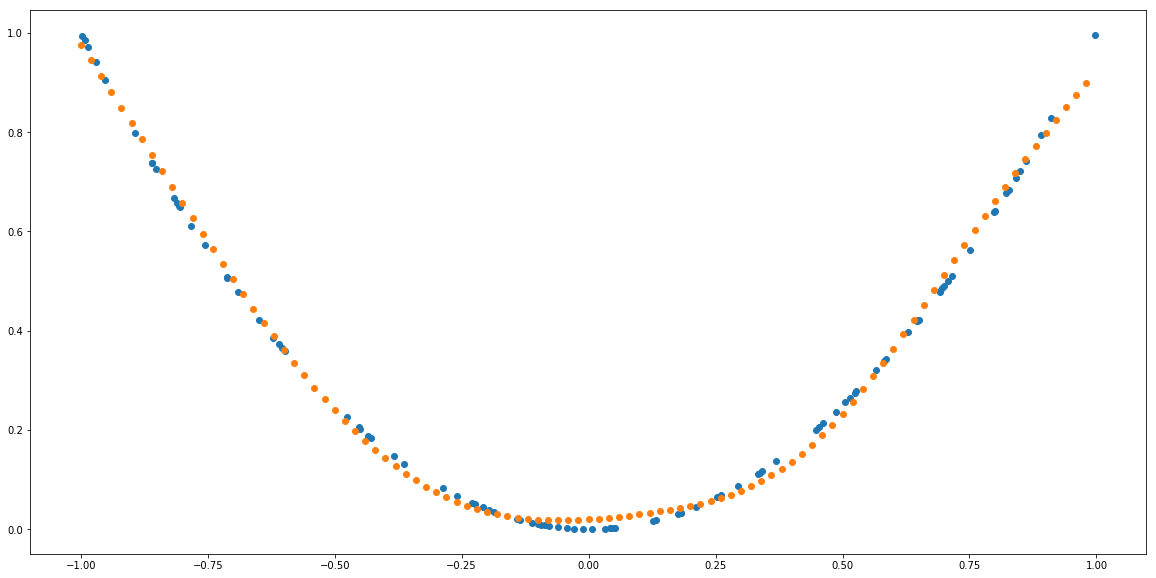

In [9]:
plt.plot(x,y,'o')
xx=[[2*(i*0.01-0.5)] for i in range(100)]
yy=[nn.evaluate(i)[0] for i in xx]
plt.plot(xx,yy,'o')